In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


IMPORTING DATASET

In [81]:
#COLUMN NAME SET
index_col_names=['unit_id','time_cycle']
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']


In [82]:


org_df=pd.read_csv('C:\\Users\\tanis\\VS CODE PROGRAM FILES\\PROBAB HACKATHON\\train_FD001.txt' ,delim_whitespace=True ,names=all_col)
org_df
# org_df.isnull().sum()


,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [83]:
acc_rul=pd.read_csv("RUL_FD001.txt", delim_whitespace=True, names=["RUL"])
acc_rul['unit_id']=acc_rul.index+1
acc_rul.head()

,RUL,unit_id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [84]:
# X_train1,y_train1,X_test1,y_test2=train_test_split(org_df,acc_rul ,test_size=0.2, random_state=42)


OBTAINING RUL

In [85]:
max_time_cycle=org_df.groupby('unit_id')['time_cycle'].max()
max_time_cycle
rul = pd.DataFrame(max_time_cycle).reset_index()
rul.columns = ['unit_id', 'max']
rul.head()
#LEFT-JOIN
org_df=org_df.merge(rul, on=['unit_id'], how='left')
org_df


,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,max
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [86]:
org_df['RUL']= org_df['max']-org_df['time_cycle']


In [87]:
org_df.drop('max', axis=1, inplace=True)

FEATURE SELECTION

In [94]:
#correlation of all columns except unit id and rul
org_df.iloc[:,1:-1].corr()
# org_df.corr()


,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
time_cycle,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,0.105980,...,-0.611354,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923
oper_set1,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,-0.001340,...,-0.001491,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559
oper_set2,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,0.014355,...,-0.010923,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846
oper_set3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,0.132242,...,-0.724578,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050
sm_3,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,0.116039,...,-0.680307,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901
sm_4,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,0.150480,...,-0.815591,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193
sm_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_6,0.105980,-0.001340,0.014355,NaN,NaN,0.132242,0.116039,0.150480,NaN,1.000000,...,-0.155884,0.158276,-0.002112,0.149042,NaN,0.130810,NaN,NaN,-0.141419,-0.137419


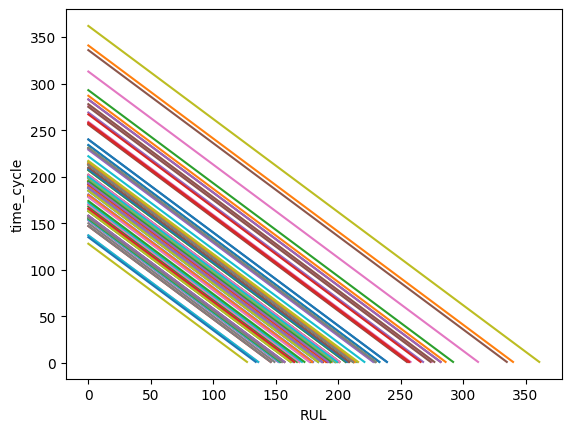

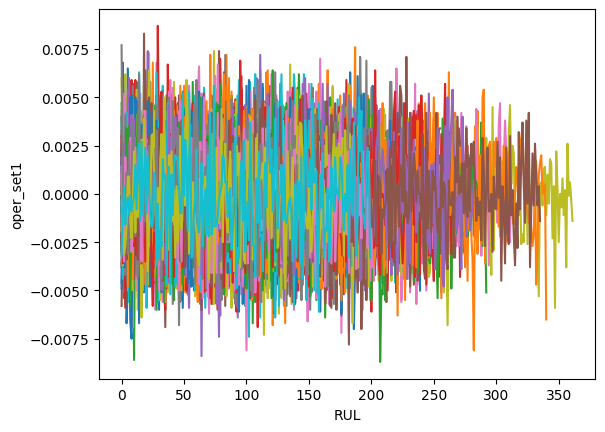

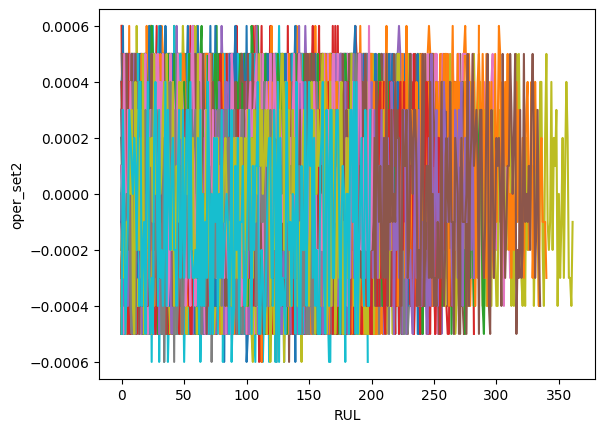

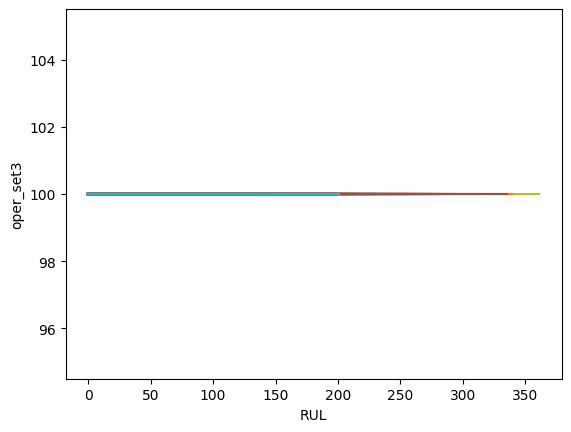

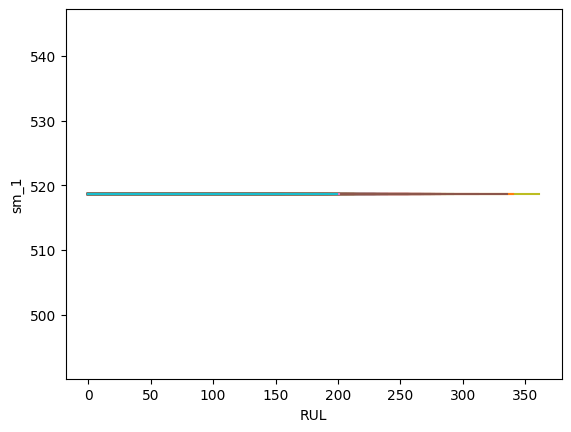

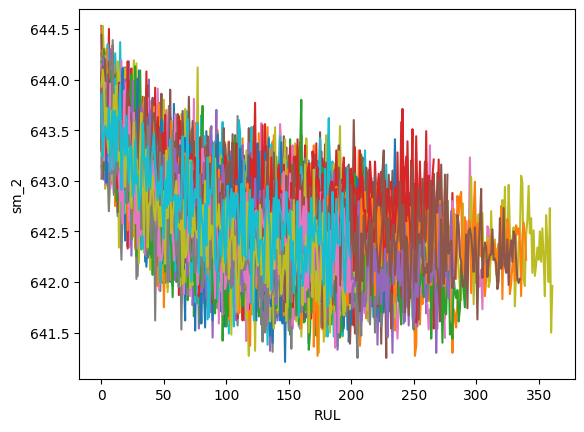

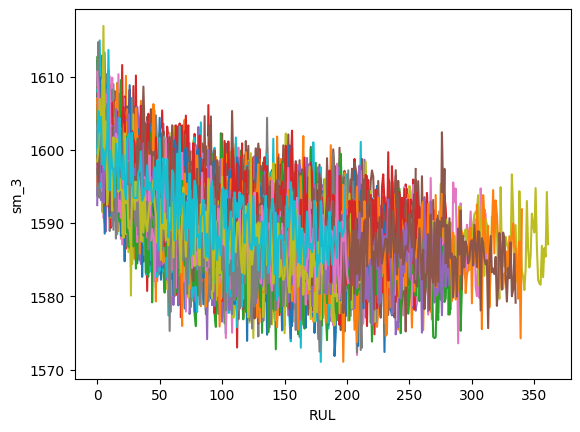

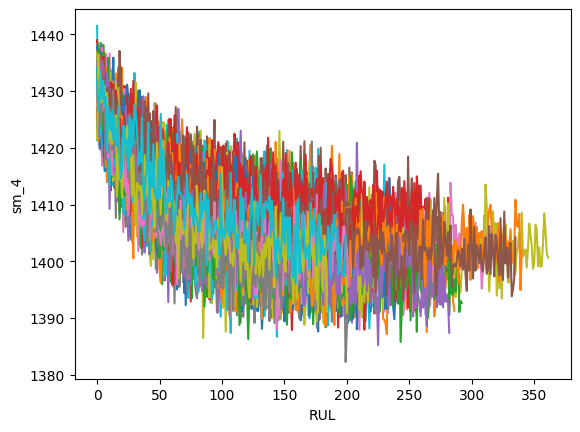

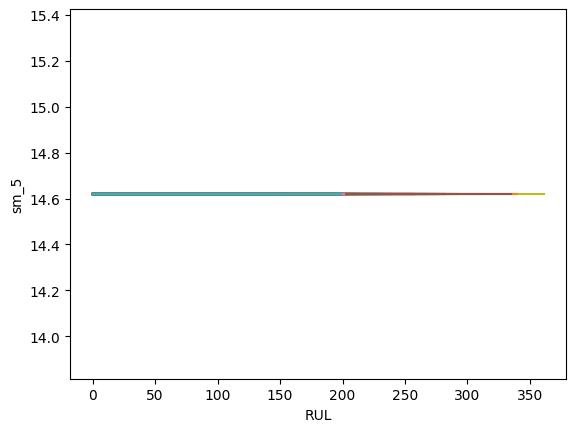

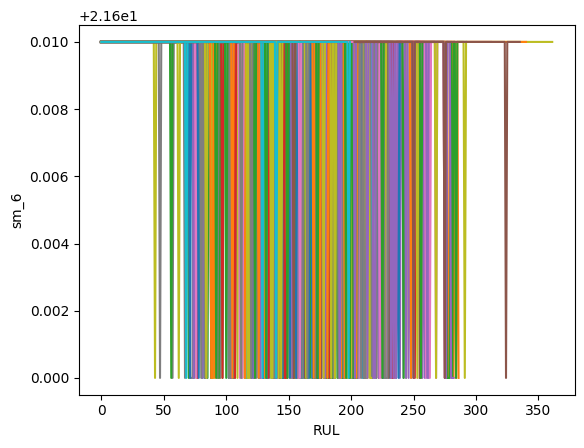

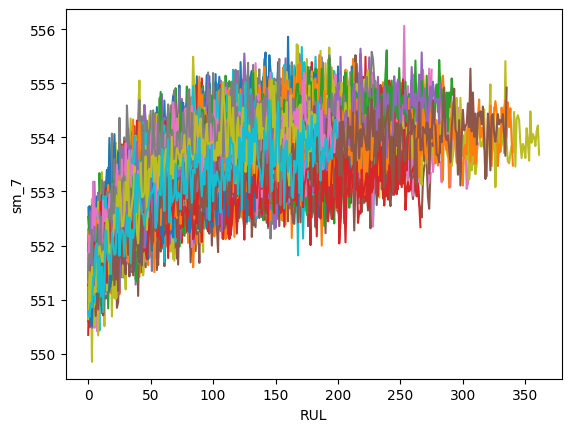

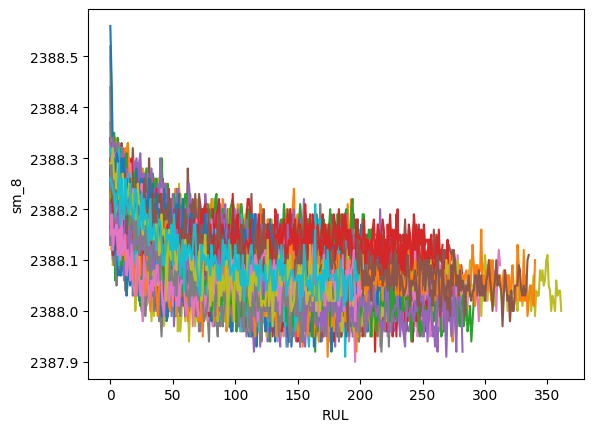

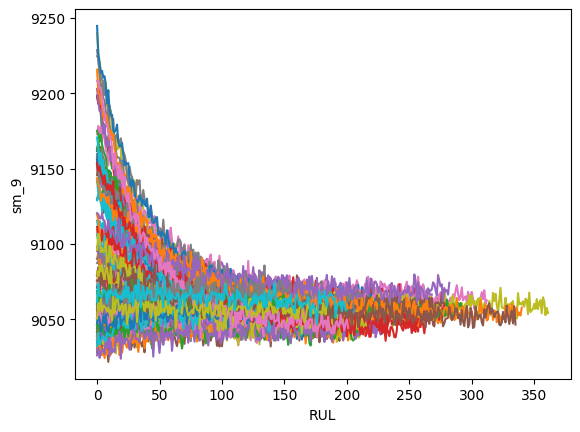

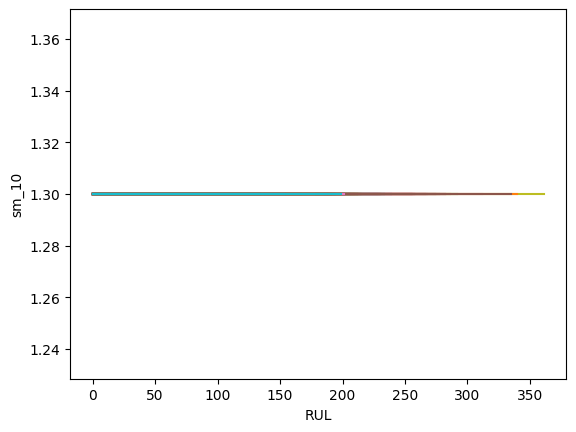

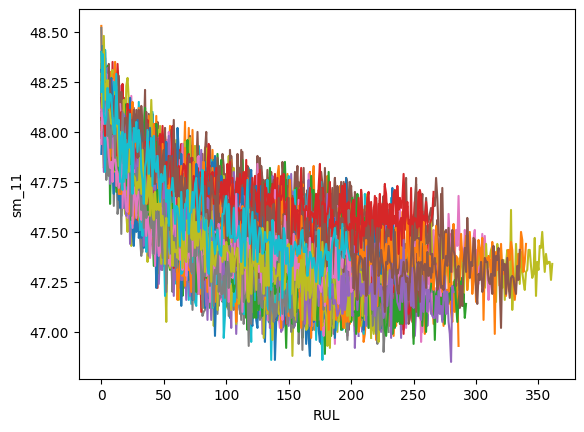

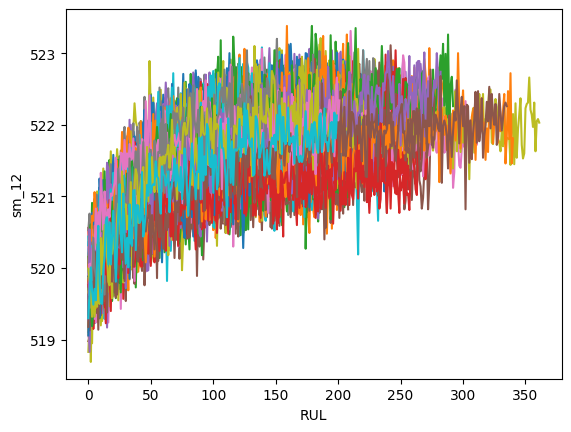

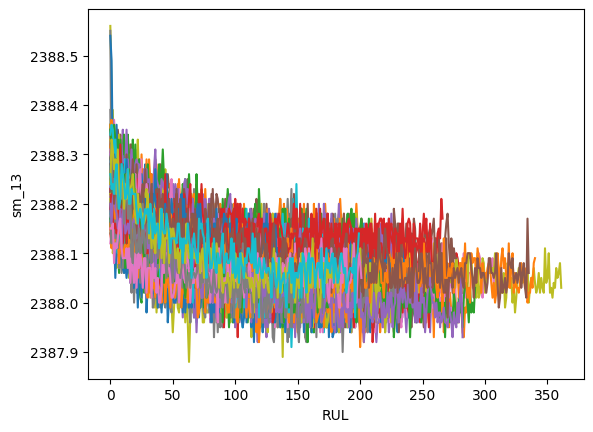

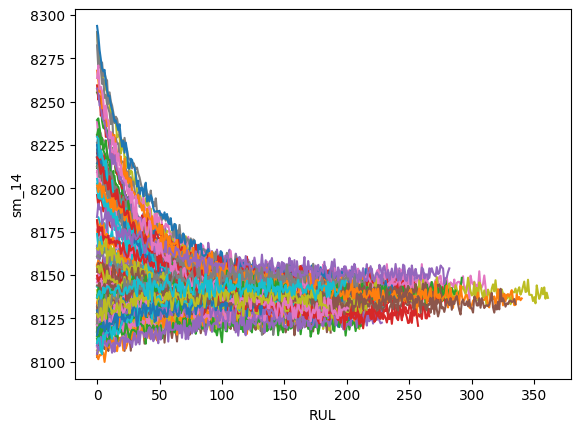

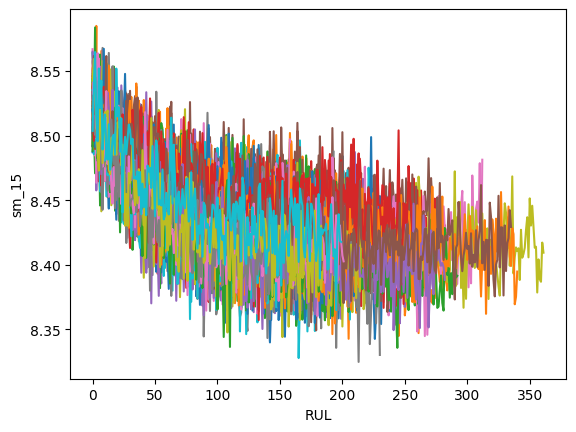

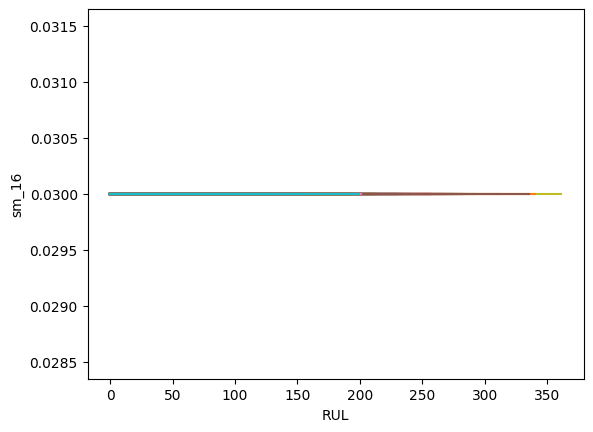

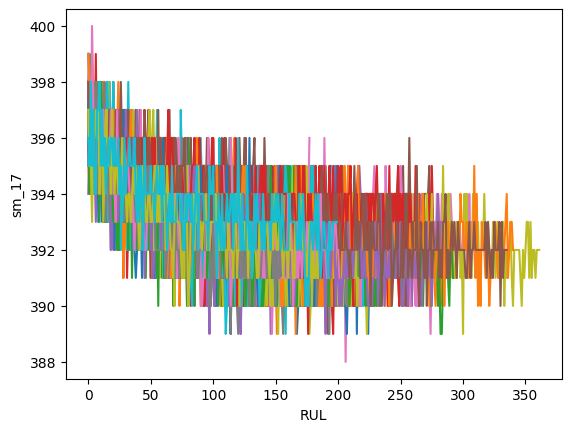

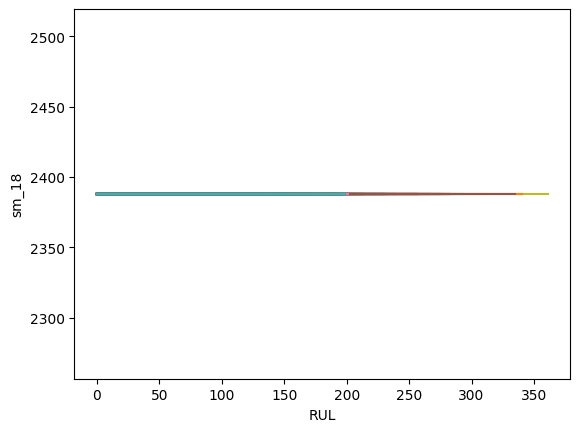

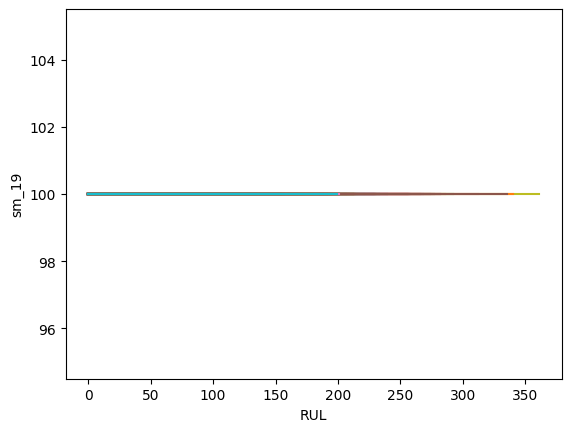

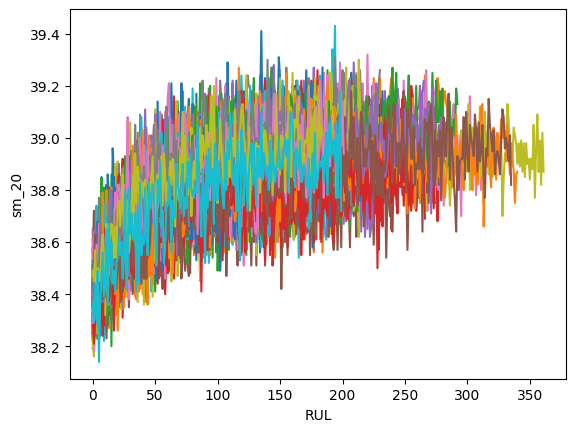

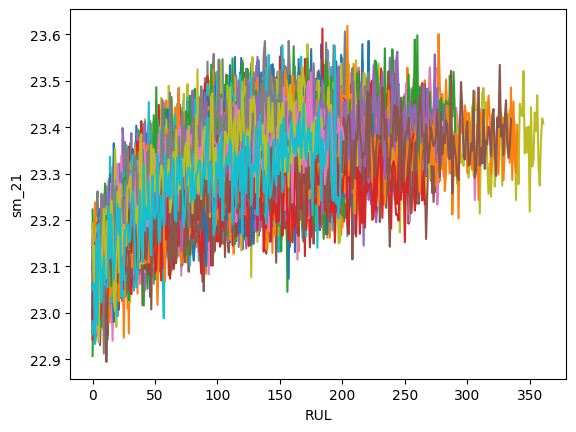

In [89]:

for v_idx,v in enumerate(all_col[1:]):
    for i in org_df['unit_id'].unique():
        plt.plot('RUL',v,data=org_df[org_df['unit_id']==i])
    plt.xlabel('RUL')
    plt.ylabel(v)
    plt.show()    

In [90]:
useless_col=['oper_set3','sm_1','sm_5','sm_6','sm_10','sm_14','sm_16','sm_18','sm_19']
train_df=org_df.drop(useless_col, axis=1)
train_df

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


DATA PREPROCESSING

In [91]:
from sklearn.preprocessing import MinMaxScaler
features=list(train_df.columns[1:-1])
features

['time_cycle',
 'oper_set1',
 'oper_set2',
 'sm_2',
 'sm_3',
 'sm_4',
 'sm_7',
 'sm_8',
 'sm_9',
 'sm_11',
 'sm_12',
 'sm_13',
 'sm_15',
 'sm_17',
 'sm_20',
 'sm_21']

In [104]:
# train_df.drop(['unit_id','RUL'],axis=1).columns

In [108]:
X = train_df.drop(['unit_id','RUL'],axis=1).values
y = train_df['RUL'].values


array([[ 1.00000e+00, -7.00000e-04, -4.00000e-04, ...,  3.92000e+02,
         3.90600e+01,  2.34190e+01],
       [ 2.00000e+00,  1.90000e-03, -3.00000e-04, ...,  3.92000e+02,
         3.90000e+01,  2.34236e+01],
       [ 3.00000e+00, -4.30000e-03,  3.00000e-04, ...,  3.90000e+02,
         3.89500e+01,  2.33442e+01],
       ...,
       [ 1.98000e+02,  4.00000e-04,  0.00000e+00, ...,  3.98000e+02,
         3.84400e+01,  2.29333e+01],
       [ 1.99000e+02, -1.10000e-03,  3.00000e-04, ...,  3.95000e+02,
         3.82900e+01,  2.30640e+01],
       [ 2.00000e+02, -3.20000e-03, -5.00000e-04, ...,  3.96000e+02,
         3.83700e+01,  2.30522e+01]])

AI ML 

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [117]:
X_train,x_val, y_train, y_val=train_test_split(X,y,test_size=0.2,random_state=42)
y_train

array([167, 115, 115, ...,  74, 255, 157], dtype=int64)

In [118]:
#Training the dataset in the model
reg=GradientBoostingRegressor(max_depth=5, n_estimators=500,random_state=42)
reg.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=42)

PREDICTION AND EVALUATION


In [121]:
y_pred=reg.predict(X_train)
y_pred

array([176.66762509, 101.92221565, 117.54104351, ...,  94.72794643,
       220.65671454, 181.39606409])

ACCURACY

In [122]:
print(r2_score(y_pred,y_train))

0.8503453999924352
